## **INTRODUCCIÓN**


## **CARGA DE LIBRERÍAS**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from numpy import genfromtxt
from datetime import datetime

In [0]:
matrix = pd.read_csv('Data.csv', sep=',')

In [64]:
matrix

,Severity,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
1,2,32.0,32.0,75,25.94,8.0,3.0,0.00,0,0,0,0,1,0,0,0,0,0,0,0,0
2,2,57.0,57.0,29,29.02,10.0,7.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0
3,2,60.0,60.0,93,29.00,10.0,5.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,88.0,88.0,53,28.83,10.0,7.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2,75.0,75.0,44,29.84,10.0,12.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0
6,3,71.0,71.0,63,29.99,10.0,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0
7,2,56.0,56.0,84,29.99,10.0,6.0,0.00,1,0,0,0,0,0,0,0,1,0,0,0,0
8,4,71.0,71.0,27,29.83,10.0,7.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2,84.0,84.0,85,29.79,7.0,8.0,0.00,0,0,1,0,0,0,0,0,0,0,0,1,0
10,2,60.0,60.0,86,29.77,10.0,7.0,0.00,0,0,1,0,0,0,0,0,0,0,0,1,0


In [123]:
# Procesamiento de datos 

train_size = 0.75
test_size = 1 - train_size

auxMatrix = matrix.to_numpy()
patterns_target = auxMatrix[:, :1] - 2
patterns_input = auxMatrix[:, 1:]

#Creando conjuntos de entrenamiento, validacion y test
input_train, input_valid, target_train, target_valid = train_test_split(patterns_input, patterns_target, 
  train_size=train_size, test_size=test_size, random_state=0, shuffle=True)

print("<Conjunto_Input_Entrenamiento>.shape = ",input_train.shape)
print("<Conjunto_ValidacionOutput_Entrenamiento>.shape = ",target_train.shape)

input_test, input_valid, target_test, target_valid = train_test_split(input_valid, target_valid,
  train_size=train_size,test_size=test_size, random_state=0, shuffle=True)

print("<Conjunto_Input_Test>.shape = ",input_test.shape)
print("<Conjunto_ValidacionOutput_Test>.shape = ",target_test.shape)
print("<Conjunto_Input_Validacion>.shape = ",input_valid.shape)
print("<Conjunto_ValidacionOutput_Validacion>.shape = ",target_valid.shape)

('<Conjunto_Input_Entrenamiento>.shape = ', (900, 20))
('<Conjunto_ValidacionOutput_Entrenamiento>.shape = ', (900, 1))
('<Conjunto_Input_Test>.shape = ', (225, 20))
('<Conjunto_ValidacionOutput_Test>.shape = ', (225, 1))
('<Conjunto_Input_Validacion>.shape = ', (75, 20))
('<Conjunto_ValidacionOutput_Validacion>.shape = ', (75, 1))


In [124]:
max_iter=1000
per = Perceptron(max_iter=max_iter, shuffle=False, random_state=0, verbose=True)
per.fit(input_train, target_train)
predict_train = per.predict(input_train)
predict_valid = per.predict(input_valid)
print("Train accuracy: %.3f%%" % (accuracy_score(target_train, predict_train) * 100))
print("Valid accuracy: %.3f%%" % (accuracy_score(target_valid, predict_valid) * 100))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Se han truncado las últimas 5000 líneas del flujo de salida.
Norm: 6709.33, NNZs: 15, Bias: -10.000000, T: 301500, Avg. loss: 2761.493639
Total training time: 0.17 seconds.
-- Epoch 336
Norm: 6715.11, NNZs: 15, Bias: -10.000000, T: 302400, Avg. loss: 2720.224959
Total training time: 0.17 seconds.
-- Epoch 337
Norm: 6726.07, NNZs: 15, Bias: -10.000000, T: 303300, Avg. loss: 2820.437989
Total training time: 0.17 seconds.
-- Epoch 338
Norm: 6733.10, NNZs: 15, Bias: -10.000000, T: 304200, Avg. loss: 2650.499464
Total training time: 0.17 seconds.
-- Epoch 339
Norm: 6743.32, NNZs: 15, Bias: -10.000000, T: 305100, Avg. loss: 2797.540964
Total training time: 0.18 seconds.
-- Epoch 340
Norm: 6749.64, NNZs: 15, Bias: -10.000000, T: 306000, Avg. loss: 2663.958295
Total training time: 0.18 seconds.
-- Epoch 341
Norm: 6763.12, NNZs: 15, Bias: -9.000000, T: 306900, Avg. loss: 2798.408833
Total training time: 0.18 seconds.
-- Epoch 342
Norm: 6775.00, NNZs: 15, Bias: -9.000000, T: 307800, Avg. loss: 2

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s finished


## **PERCEPTRON SIMPLE**

In [0]:
def MLP_train_valid(mlp, input_train, target_train, input_valid, target_valid, max_iter, valid_cycles, verbose):
  """
  Train and valid MLP every valid_cycles iterations
  """
  classes  = np.unique(target_train)
  print(classes)
  loss_valid = []
  for i in range(int(max_iter/valid_cycles)):
    for j in range(valid_cycles):
      out = mlp.partial_fit(input_train, target_train, classes)
      # Calculate loss function of valid set
    last_lost_valid = log_loss(target_valid, mlp.predict_proba(input_valid))
    loss_valid.append(last_lost_valid)
    if verbose:
        print("Iteration %d, train loss = %.8f, valid loss = %.8f" %
        (mlp.n_iter_, mlp.loss_, last_lost_valid))
    if early_stopping and (i > 0) and (last_lost_valid > loss_valid[-2]): # Early stopping
        if verbose:
          print("Early stopping: Validation score did not improve")
        break

  if verbose: 
    print(out)
    learning_rate_init = 0.1
    print("Visualizing the Cost Function Trajectory")
    plt.plot(range(1, len(mlp.loss_curve_)+1), mlp.loss_curve_, label='Train loss')
    plt.plot(range(valid_cycles,len(loss_valid)*valid_cycles+valid_cycles,valid_cycles), loss_valid, '-o', label='Valid loss')
    plt.xlabel('number of iterations')
    plt.ylabel('loss function')
    plt.legend(loc='upper right')
    plt.show()

Learning a MLP with 400 hidden neurons, 300 maximum number of iterations and 0.10000000 learning rate ...
[0. 1. 2.]
Iteration 5, train loss = 3.28613887, valid loss = 1.11557707
Iteration 10, train loss = 0.79251365, valid loss = 0.67232940
Iteration 15, train loss = 0.74758153, valid loss = 0.64224772
Iteration 20, train loss = 0.74674930, valid loss = 0.63526389
Iteration 25, train loss = 0.74663792, valid loss = 0.63670712
Early stopping: Validation score did not improve
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(400,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=0, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Visualizing the Cost Function Trajectory


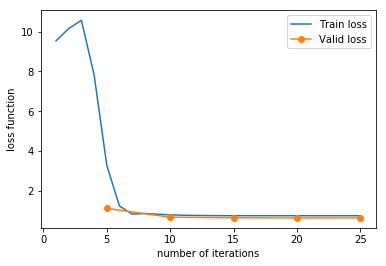

In [128]:
n_hidden = 20*20 #60
max_iter = 300
learning_rate_init = 0.1
valid_cycles = 5
early_stopping = True
print("Learning a MLP with %d hidden neurons, %d maximum number of iterations and %.8f learning rate ..." % (n_hidden, max_iter, learning_rate_init))
mlp = MLPClassifier(hidden_layer_sizes=(n_hidden,), learning_rate_init=learning_rate_init, shuffle=False, random_state=0, verbose=False)
MLP_train_valid(mlp, input_train, target_train, input_valid, target_valid, max_iter, valid_cycles, True)

In [129]:
predict_train = mlp.predict(input_train)
predict_valid = mlp.predict(input_valid)
print("Train accuracy: %.3f%%" % (accuracy_score(target_train, predict_train) * 100))
print("Valid accuracy: %.3f%%" % (accuracy_score(target_valid, predict_valid) * 100))
print("Train confusion matrix:")
print(confusion_matrix(target_train, predict_train))
print("Valid confusion matrix:")
print(confusion_matrix(target_valid, predict_valid))
print("Train classification report:")
print(classification_report(target_train, predict_train))
print("Valid classification report:")
print(classification_report(target_valid, predict_valid))

Train accuracy: 66.778%
Valid accuracy: 74.667%
Train confusion matrix:
[[601   0   0]
 [268   0   0]
 [ 31   0   0]]
Valid confusion matrix:
[[56  0  0]
 [18  0  0]
 [ 1  0  0]]
Train classification report:
              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80       601
         1.0       0.00      0.00      0.00       268
         2.0       0.00      0.00      0.00        31

   micro avg       0.67      0.67      0.67       900
   macro avg       0.22      0.33      0.27       900
weighted avg       0.45      0.67      0.53       900

Valid classification report:
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.85        56
         1.0       0.00      0.00      0.00        18
         2.0       0.00      0.00      0.00         1

   micro avg       0.75      0.75      0.75        75
   macro avg       0.25      0.33      0.28        75
weighted avg       0.56      0.75      0.64        75



Optimizacion aprendizaje rate

[0. 1. 2.]
[0. 1. 2.]
[0. 1. 2.]
[0. 1. 2.]
[0. 1. 2.]


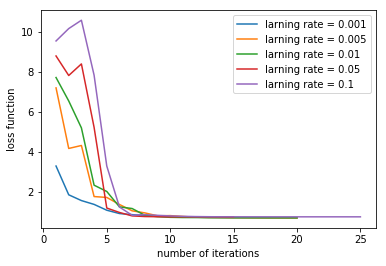

In [130]:
tests_learning_rate_init = [0.001, 0.005, 0.01, 0.05, 0.1]
activation = 'relu'
random_state = 0
loss_curves =  []
for lr in tests_learning_rate_init:
   mlp = MLPClassifier(hidden_layer_sizes=(n_hidden,), learning_rate_init=lr, shuffle=False, random_state=random_state, verbose=False, activation=activation)
   MLP_train_valid(mlp, input_train, target_train, input_valid, target_valid, max_iter, valid_cycles, False)
   loss_curves.append(mlp.loss_curve_)

for (lr, loss_curve) in zip(tests_learning_rate_init, loss_curves):
   plt.plot(range(1, len(loss_curve)+1), loss_curve, label='larning rate = ' + str(lr))
   
plt.xlabel('number of iterations')
plt.ylabel('loss function')
plt.legend(loc='upper right')
plt.show()

opti arq

In [131]:
from datetime import datetime

tests_n_hidden = [10, 30, 50, 70, 90, 110, 130, 150, 170, 190]
n_reps = 10
activation = 'relu'
learning_rate_init = 0.005
now = datetime.now()
best_mlp = []
best_acc = 0.0
accs_train = []
accs_valid = []
for n_hidden in tests_n_hidden:
   max_acc_train = max_acc_valid = 0.0
   for random_state in range(n_reps):
       mlp = MLPClassifier(hidden_layer_sizes=(n_hidden,), learning_rate_init=learning_rate_init, shuffle=False, random_state=random_state, verbose=False, activation=activation)
       MLP_train_valid(mlp, input_train, target_train, input_valid, target_valid, max_iter, valid_cycles, False)
       
       acc_train = accuracy_score(target_train, mlp.predict(input_train))
       acc_valid = accuracy_score(target_valid,mlp.predict(input_valid))
       print("Seed = %d, train acc = %.8f, valid acc = %.8f, iterations = %d" % (random_state, acc_train, acc_valid, len(mlp.loss_curve_)))
       if (max_acc_valid < acc_valid):
           max_acc_valid = acc_valid
           max_acc_train = acc_train
           if (acc_valid > best_acc):
               best_acc = acc_valid
               best_mlp = mlp
   accs_train.append(max_acc_train)
   accs_valid.append(max_acc_valid)
   print("Number hidden units = %i, train acc = %.8f, max valid acc = %.8f" % (n_hidden, max_acc_train, max_acc_valid))
print("Number of seconds for training: %d" % (datetime.now() - now).total_seconds())
print("Best MLP valid accuracy: %.8f%%" % (best_acc * 100))
print("Best MLP: ", best_mlp)

Seed = 4, train acc = 0.68000000, valid acc = 0.70666667, iterations = 45
[0. 1. 2.]
Seed = 5, train acc = 0.64222222, valid acc = 0.77333333, iterations = 30
[0. 1. 2.]
Seed = 6, train acc = 0.67444444, valid acc = 0.77333333, iterations = 45
[0. 1. 2.]
Seed = 7, train acc = 0.65666667, valid acc = 0.69333333, iterations = 25
[0. 1. 2.]
Seed = 8, train acc = 0.67444444, valid acc = 0.72000000, iterations = 25
[0. 1. 2.]
Seed = 9, train acc = 0.66222222, valid acc = 0.70666667, iterations = 15
Number hidden units = 50, train acc = 0.64888889, max valid acc = 0.77333333
[0. 1. 2.]
Seed = 0, train acc = 0.66666667, valid acc = 0.77333333, iterations = 25
[0. 1. 2.]
Seed = 1, train acc = 0.67666667, valid acc = 0.73333333, iterations = 40
[0. 1. 2.]
Seed = 2, train acc = 0.66777778, valid acc = 0.72000000, iterations = 20
[0. 1. 2.]
Seed = 3, train acc = 0.67555556, valid acc = 0.72000000, iterations = 30
[0. 1. 2.]
Seed = 4, train acc = 0.67222222, valid acc = 0.72000000, iterations = 25

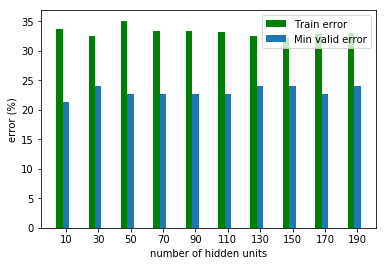

In [132]:
width = 4
plt.bar(np.array(tests_n_hidden) - width, 100 *(1- np.array(accs_train)), color='g', width=width, label='Train error')
plt.bar(np.array(tests_n_hidden), 100 *(1- np.array(accs_valid)), width=width, label='Min valid error')
plt.xlabel('number of hidden units')
plt.ylabel('error (%)')
plt.xticks(np.array(tests_n_hidden), tests_n_hidden)
plt.legend(loc='upper right')
plt.show()

resultados finales de la red

In [133]:
predict_train = best_mlp.predict(input_train)
predict_valid = best_mlp.predict(input_valid)
predict_test = best_mlp.predict(input_test)
print("Train accuracy: %.3f%%" % (accuracy_score(target_train, predict_train) * 100))
print("Valid accuracy: %.3f%%" % (accuracy_score(target_valid, predict_valid) * 100))
print("Test accuracy: %.3f%%" % (accuracy_score(target_test, predict_test) * 100))
print("Train confusion matrix:")
print(confusion_matrix(target_train, predict_train))
print("Valid confusion matrix:")
print(confusion_matrix(target_valid, predict_valid))
print("Test confusion matrix:")
print(confusion_matrix(target_test, predict_test))
print("Train classification report:")
print(classification_report(target_train, predict_train))
print("Valid classification report:")
print(classification_report(target_valid, predict_valid))
print("Test classification report:")
print(classification_report(target_test, predict_test))

Train accuracy: 66.333%
Valid accuracy: 78.667%
Test accuracy: 76.000%
Train confusion matrix:
[[562  39   0]
 [233  35   0]
 [ 29   2   0]]
Valid confusion matrix:
[[54  2  0]
 [13  5  0]
 [ 1  0  0]]
Test confusion matrix:
[[160  10   0]
 [ 38  11   0]
 [  4   2   0]]
Train classification report:
              precision    recall  f1-score   support

         0.0       0.68      0.94      0.79       601
         1.0       0.46      0.13      0.20       268
         2.0       0.00      0.00      0.00        31

   micro avg       0.66      0.66      0.66       900
   macro avg       0.38      0.36      0.33       900
weighted avg       0.59      0.66      0.59       900

Valid classification report:
              precision    recall  f1-score   support

         0.0       0.79      0.96      0.87        56
         1.0       0.71      0.28      0.40        18
         2.0       0.00      0.00      0.00         1

   micro avg       0.79      0.79      0.79        75
   macro avg      

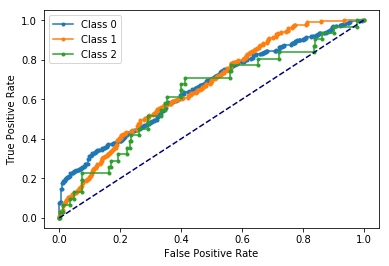

In [141]:
mlp_probs = mlp.predict_proba(input_train)
classes  = np.unique(target_train)
mlp_auc = []
mlp_fpr = []
mlp_tpr = []
for cla in classes:
   fpr, tpr, _ = roc_curve(target_train==int(cla), mlp_probs[:, int(cla)])
   mlp_fpr.append(fpr)
   mlp_tpr.append(tpr)
for cla in classes:
  plt.plot(mlp_fpr[int(cla)], mlp_tpr[int(cla)], marker='.', label='Class %d' % int(cla))

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()